# 400_Console_Life_Cycle

## Purpose

This notebook will do the analysis to answer our fourth research question based on the life cycle of a console.

## Datasets

- Input: Console_Sales_2008-2017.pkl && Console_Sales_All_Time && Clean_Games_Sales_Total.pkl
- output: 400_Console_Life_Data.pkl

In [172]:
import os 
import sys
import pandas as pd
import numpy as np 
import hashlib 
import matplotlib.pylab as plt 

%matplotlib inline 

In [173]:
if not os.path.exists("../../data/prep/Console_Sales_2008-2017.pkl"):
    print("Missing Dataset File")

In [174]:
if not os.path.exists("../../data/prep/Console_Sales_All_Time.pkl"):
    print("Missing Dataset File")

In [175]:
if not os.path.exists("../../data/prep/Clean_Games_Sales_Total.pkl"):
    print("Missing Dataset File")

## Loading the datasets

In [176]:
consoles = pd.read_pickle("../../data/prep/Console_Sales_2008-2017.pkl")
consoles.shape

(11, 12)

In [177]:
consoles_all = pd.read_pickle("../../data/prep/Console_Sales_All_Time.pkl")
consoles_all.shape

(26, 9)

In [178]:
videogames = pd.read_pickle("../../data/prep/Clean_Games_Sales_Total.pkl")
videogames.shape

(16444, 11)

## Overview of datasets

Taking a brief overview of the datasets to see the data contained in them.

In [179]:
consoles.head()

Console Abbreviation  Sales_2008  Sales_2009  Sales_2010  \
0     Playstation 4          PS4         0.0         0.0         0.0   
1   Nintendo switch           NS         0.0         0.0         0.0   
2          Xbox one         XOne         0.0         0.0         0.0   
3      Nintendo 3ds          3DS         0.0         0.0         0.0   
4  Playstation vita          PSV         0.0         0.0         0.0   

   Sales_2011  Sales_2012  Sales_2013  Sales_2014  Sales_2015  Sales_2016  \
0        0.00        0.00        4.49       14.59       17.51       17.59   
1        0.00        0.00        0.00        0.00        0.00        0.00   
2        0.00        0.00        3.08        7.91        8.63        8.37   
3       12.56       13.48       14.31        9.74        7.33        7.59   
4        0.48        3.69        4.30        2.30        2.68        2.04   

   Sales_2017  
0       19.64  
1       11.85  
2        8.21  
3        6.19  
4        0.72

In [180]:
consoles['Abbreviation'].unique()

array(['PS4', 'NS', 'XOne', '3DS', 'PSV', 'PS3', 'WiiU', 'X360', 'PSP',
       'Wii', 'DS'], dtype=object)

In [181]:
consoles_all.head()

Console Abbreviation  Sales_NA  Sales_Europe  Sales_Japan  \
0  Playstation 2          PS2     53.65         55.28        23.18   
1    Nintendo DS           DS     57.39         52.07        33.01   
2       Game Boy           GB     43.18         40.05        32.47   
3   Playstation            PS     38.94         36.91        19.36   
4   Nintendo Wii          Wii     45.51         33.88        12.77   

   Sales_Rest_Of_World  Sales_Total  Release_Year Developer  
0                25.57       157.68          2000      Sony  
1                12.43       154.90          2004  Nintendo  
2                 2.99       118.69          1989  Nintendo  
3                 9.04       104.25          1994      Sony  
4                 9.48       101.64          2006  Nintendo

In [182]:
consoles_all['Developer'].unique()

array(['Sony', 'Nintendo', 'Microsoft', 'Sega', 'Atari'], dtype=object)

In [183]:
consoles_all['Abbreviation'].unique()

array(['PS2', 'DS', 'GB', 'PS', 'Wii', 'PS3', 'X360', 'GBA', 'PSP', 'PS4',
       '3DS', 'NES', 'SNES', 'XOne', 'N64', 'GEN', '2600', 'XB', 'GC',
       'PSV', 'NS', 'WiiU', 'GG', 'SAT', 'DC', '7800'], dtype=object)

In [184]:
videogames.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales Developer  
0     41.36     28.96      3.77         8.45         82.53  Nintendo  
1     29.08      3.58      6.81         0.77         40.24       NaN  
2     15.68     12.76      3.79         3.29         35.52  Nintendo  
3     15.61     10.93      3.28         2.95         32.77  Nintendo  
4     11.27      8.89     10.22         1.00         31.37       NaN

In [185]:
 videogames['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

# Console life cycle analysis

## Yearly developer console releases

Getting each year that a developer released a new console

In [186]:
console_count = videogames.groupby('Year_of_Release', as_index = False)['Global_Sales'].sum()
console_count = console_count.set_index('Year_of_Release')

In [187]:
sony = consoles_all[consoles_all['Developer'] == 'Sony']
tmp = sony.groupby('Release_Year')['Abbreviation'].count()
console_count['Sony'] = tmp

In [188]:
nintendo = consoles_all[consoles_all['Developer'] == 'Nintendo']
tmp = nintendo.groupby('Release_Year')['Abbreviation'].count()
console_count['Nintendo'] = tmp

In [189]:
microsoft = consoles_all[consoles_all['Developer'] == 'Microsoft']
tmp = microsoft.groupby('Release_Year')['Abbreviation'].count()
console_count['Microsoft'] = tmp

In [190]:
sega = consoles_all[consoles_all['Developer'] == 'Sega']
tmp = sega.groupby('Release_Year')['Abbreviation'].count()
console_count['Sega'] = tmp

In [191]:
atari = consoles_all[consoles_all['Developer'] == 'Atari']
tmp = atari.groupby('Release_Year')['Abbreviation'].count()
console_count['Atari'] = tmp

In [192]:
console_count.fillna(value = 0, inplace = True)
del console_count['Global_Sales']
console_count.head()

Sony  Nintendo  Microsoft  Sega  Atari
Year_of_Release                                        
1980.0            0.0       0.0        0.0   0.0    0.0
1981.0            0.0       0.0        0.0   0.0    0.0
1982.0            0.0       0.0        0.0   0.0    0.0
1983.0            0.0       1.0        0.0   0.0    0.0
1984.0            0.0       0.0        0.0   0.0    0.0

C:\Users\Ciaran\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


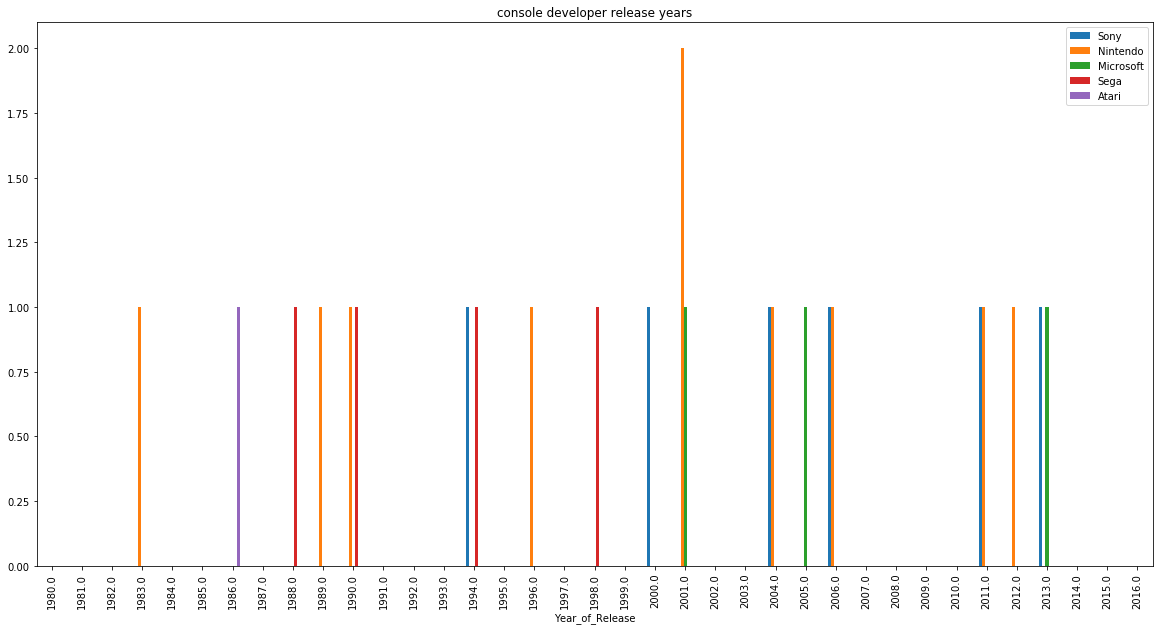

In [193]:
console_count.plot(y = ['Sony', 'Nintendo', 'Microsoft','Sega', 'Atari'], kind = 'bar', title = 'console developer release years', figsize = (20,10))

## Yearly console sales

Graphing the yearly sales of each console in the consoles dataset

In [194]:
consoles1 = consoles
del consoles1['Abbreviation']
consoles1 = consoles1.set_index('Console')
consoles1.rename(columns={'Sales_2008': 2008}, inplace=True)
consoles1.rename(columns={'Sales_2009': 2009}, inplace=True)
consoles1.rename(columns={'Sales_2010': 2010}, inplace=True)
consoles1.rename(columns={'Sales_2011': 2011}, inplace=True)
consoles1.rename(columns={'Sales_2012': 2012}, inplace=True)
consoles1.rename(columns={'Sales_2013': 2013}, inplace=True)
consoles1.rename(columns={'Sales_2014': 2014}, inplace=True)
consoles1.rename(columns={'Sales_2015': 2015}, inplace=True)
consoles1.rename(columns={'Sales_2016': 2016}, inplace=True)
consoles1.rename(columns={'Sales_2017': 2017}, inplace=True)
consoles1 = consoles1.transpose()
consoles1.index.name = 'Year'

In [195]:
consoles1.columns.values

array(['Playstation 4', 'Nintendo switch', 'Xbox one', 'Nintendo 3ds',
       'Playstation vita', 'Playstation 3', 'Nintendo wii u', 'Xbox 360',
       'PSP', 'Nintendo wii ', 'Nintendo ds'], dtype=object)

C:\Users\Ciaran\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


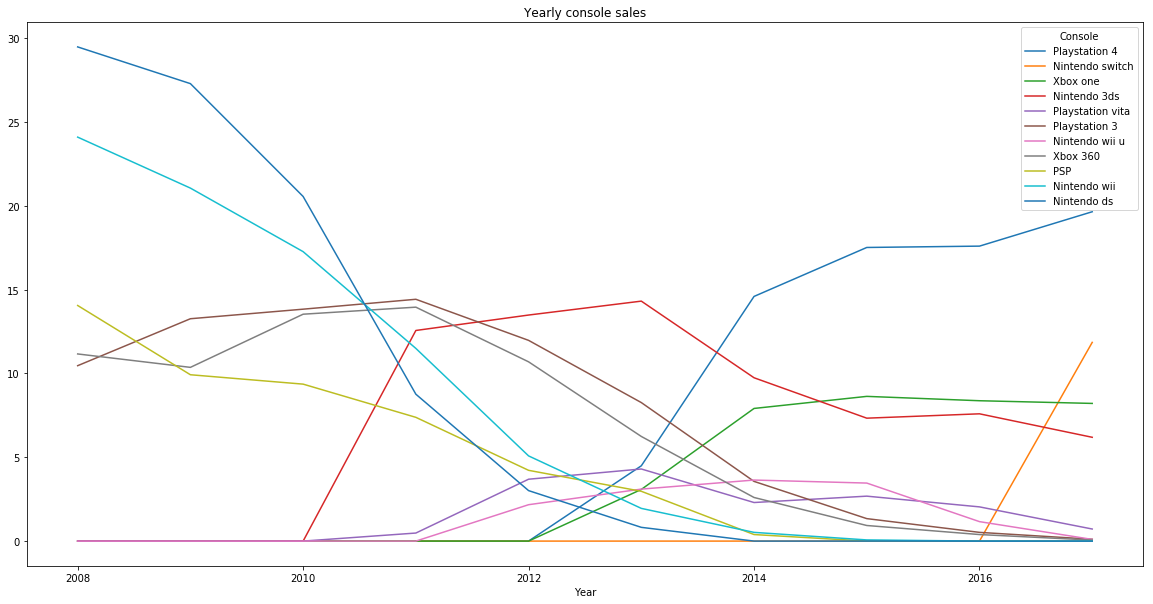

In [198]:
consoles1.plot(y = ['Playstation 4', 'Nintendo switch', 'Xbox one', 'Nintendo 3ds', 'Playstation vita', 'Playstation 3', 'Nintendo wii u',
               'Xbox 360', 'PSP', 'Nintendo wii ', 'Nintendo ds'], kind = 'line', title = 'Yearly console sales', figsize = (20,10))

From aove we can see the sales of different consoles over a 10 year period. It looks a bit messy but gives us a good insight into what we should use while doing our results.

## Yearly game sales per console

Getting the yearly sales of games for each console.

In [199]:
console = videogames.groupby('Year_of_Release', as_index = False)['Global_Sales'].sum()
console = console.set_index('Year_of_Release')

In [200]:
nes = videogames[videogames['Platform'] == 'NES']
tmp = nes.groupby('Year_of_Release')['Global_Sales'].sum()
console['NES'] = tmp

In [201]:
wii = videogames[videogames['Platform'] == 'Wii']
tmp = wii.groupby('Year_of_Release')['Global_Sales'].sum()
console['Wii'] = tmp

In [202]:
gb = videogames[videogames['Platform'] == 'GB']
tmp = gb.groupby('Year_of_Release')['Global_Sales'].sum()
console['GB'] = tmp

In [203]:
ds = videogames[videogames['Platform'] == 'DS']
tmp = ds.groupby('Year_of_Release')['Global_Sales'].sum()
console['DS'] = tmp

In [204]:
x360 = videogames[videogames['Platform'] == 'X360']
tmp = x360.groupby('Year_of_Release')['Global_Sales'].sum()
console['X360'] = tmp

In [205]:
ps3 = videogames[videogames['Platform'] == 'PS3']
tmp = ps3.groupby('Year_of_Release')['Global_Sales'].sum()
console['PS3'] = tmp

In [206]:
ps2 = videogames[videogames['Platform'] == 'PS2']
tmp = ps2.groupby('Year_of_Release')['Global_Sales'].sum()
console['PS2'] = tmp

In [207]:
snes = videogames[videogames['Platform'] == 'SNES']
tmp = snes.groupby('Year_of_Release')['Global_Sales'].sum()
console['SNES'] = tmp

In [208]:
gba = videogames[videogames['Platform'] == 'GBA']
tmp = gba.groupby('Year_of_Release')['Global_Sales'].sum()
console['GBA'] = tmp

In [209]:
ps4 = videogames[videogames['Platform'] == 'PS4']
tmp = ps4.groupby('Year_of_Release')['Global_Sales'].sum()
console['PS4'] = tmp

In [210]:
tds = videogames[videogames['Platform'] == '3DS']
tmp = tds.groupby('Year_of_Release')['Global_Sales'].sum()
console['3DS'] = tmp

In [211]:
n64 = videogames[videogames['Platform'] == 'N64']
tmp = n64.groupby('Year_of_Release')['Global_Sales'].sum()
console['N64'] = tmp

In [212]:
ps = videogames[videogames['Platform'] == 'PS']
tmp = ps.groupby('Year_of_Release')['Global_Sales'].sum()
console['PS'] = tmp

In [213]:
xb = videogames[videogames['Platform'] == 'XB']
tmp = xb.groupby('Year_of_Release')['Global_Sales'].sum()
console['XB'] = tmp

In [214]:
pc = videogames[videogames['Platform'] == 'PC']
tmp = pc.groupby('Year_of_Release')['Global_Sales'].sum()
console['PC'] = tmp

In [215]:
a2600 = videogames[videogames['Platform'] == '2600']
tmp = a2600.groupby('Year_of_Release')['Global_Sales'].sum()
console['2600'] = tmp

In [216]:
psp = videogames[videogames['Platform'] == 'PSP']
tmp = psp.groupby('Year_of_Release')['Global_Sales'].sum()
console['PSP'] = tmp

In [217]:
xone = videogames[videogames['Platform'] == 'XOne']
tmp = xone.groupby('Year_of_Release')['Global_Sales'].sum()
console['XOne'] = tmp

In [218]:
wiiu = videogames[videogames['Platform'] == 'WiiU']
tmp = wiiu.groupby('Year_of_Release')['Global_Sales'].sum()
console['WiiU'] = tmp

In [219]:
gc = videogames[videogames['Platform'] == 'GC']
tmp = gc.groupby('Year_of_Release')['Global_Sales'].sum()
console['GC'] = tmp

In [220]:
gen = videogames[videogames['Platform'] == 'GEN']
tmp = gen.groupby('Year_of_Release')['Global_Sales'].sum()
console['GEN'] = tmp

In [221]:
dc = videogames[videogames['Platform'] == 'DC']
tmp = dc.groupby('Year_of_Release')['Global_Sales'].sum()
console['DC'] = tmp

In [222]:
psv = videogames[videogames['Platform'] == 'PSV']
tmp = psv.groupby('Year_of_Release')['Global_Sales'].sum()
console['PSV'] = tmp

In [ ]:
sat = videogames[videogames['Platform'] == 'SAT']
tmp = sat.groupby('Year_of_Release')['Global_Sales'].sum()
console['SAT'] = tmp

In [223]:
scd = videogames[videogames['Platform'] == 'SCD']
tmp = scd.groupby('Year_of_Release')['Global_Sales'].sum()
console['SCD'] = tmp

In [224]:
ws = videogames[videogames['Platform'] == 'WS']
tmp = ws.groupby('Year_of_Release')['Global_Sales'].sum()
console['WS'] = tmp

In [225]:
ng = videogames[videogames['Platform'] == 'NG']
tmp = ng.groupby('Year_of_Release')['Global_Sales'].sum()
console['NG'] = tmp

In [226]:
tg16 = videogames[videogames['Platform'] == 'TG16']
tmp = tg16.groupby('Year_of_Release')['Global_Sales'].sum()
console['TG16'] = tmp

In [227]:
dO = videogames[videogames['Platform'] == '3DO']
tmp = dO.groupby('Year_of_Release')['Global_Sales'].sum()
console['3DO'] = tmp

In [228]:
gg = videogames[videogames['Platform'] == 'GG']
tmp = gg.groupby('Year_of_Release')['Global_Sales'].sum()
console['GG'] = tmp

In [229]:
pcfx = videogames[videogames['Platform'] == 'PCFX']
tmp = pcfx.groupby('Year_of_Release')['Global_Sales'].sum()
console['PCFX'] = tmp

In [230]:
del console['Global_Sales']

In [231]:
console.fillna(value = 0, inplace = True)
console.head()

NES  Wii   GB   DS  X360  PS3  PS2  SNES  GBA  PS4  ...   \
Year_of_Release                                                        ...    
1980.0            0.00  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  ...    
1981.0            0.00  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  ...    
1982.0            0.00  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  ...    
1983.0           10.96  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  ...    
1984.0           50.09  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  ...    

                 GEN   DC  PSV  SCD   WS   NG  TG16  3DO   GG  PCFX  
Year_of_Release                                                      
1980.0           0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  
1981.0           0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  
1982.0           0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  
1983.0           0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  
1984.0           0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  

[5 rows x 30 columns]

The above is a dataframe of the yearly game sales on each console. It can be used in our results notebook to compare one console with another

## Merging dataframes

In [232]:
frames = [console,console_count]
console_yearly = pd.concat(frames)

## Saving to a pickle

In [234]:
console_yearly.to_pickle("../../data/analysis/400_Console_Life_Yearly_Data.pkl.pkl")
consoles1.to_pickle("../../data/analysis/400_Console_Sales.pkl.pkl")